# Radar Data Example

This notebook demonstrates how to load, visualize, and manipulate Radar data using the `fomo_sdk`.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pathlib import Path
from fomo_sdk.radar.utils import load_fomo_radar, save, polar_to_cartesian
from fomo_sdk.lidar.utils import transform_points, load_fomo_lidar, make_top_view
from fomo_sdk.tf.utils import FoMoTFTree

## 1. Load Raw Data (.png)

We will load a radar image file. The png image is expected to be the Oxford format.

In [2]:
dataset_base_path = "data"
deployment = "2025-10-14"
trajectory = "red"

radar_file = Path("data/radar.png")

timestamps, azimuths, fft_data = load_fomo_radar(
    dataset_base_path, deployment, trajectory
)

print(f"Loaded {len(timestamps)} radar measurements")
print("First 5 measurements:")
df = pd.DataFrame(
    {
        "timestamps": timestamps.flatten(),
        "azimuths": azimuths.flatten(),
        "fft meas": fft_data.shape[1],
        "mean fft": fft_data.mean(axis=1),
    }
)
print(df.head())

Loaded 400 radar measurements
First 5 measurements:
         timestamps  azimuths  fft meas   mean fft
0  1760456485551626  0.007861      6848  28.257010
1  1760456485552251  0.023583      6848  22.856600
2  1760456485552876  0.039305      6848  28.746933
3  1760456485553501  0.055027      6848  23.800526
4  1760456485554126  0.070749      6848  27.473715


## 2. Visualization

We can create a polar and a cartesien view of the radar scan.

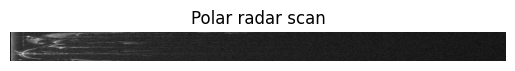

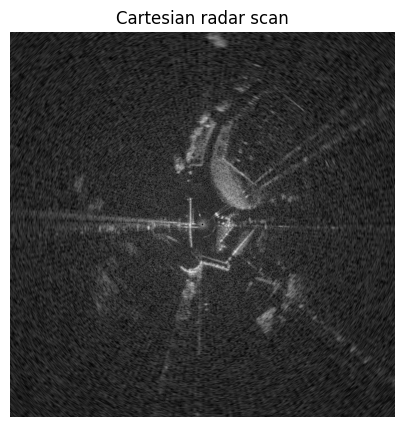

In [4]:
plt.imshow(fft_data, cmap="gray")
plt.title("Polar radar scan")
plt.axis("off")
plt.show()

cartesian_data = polar_to_cartesian(fft_data, azimuths)
plt.figure(figsize=(5, 5))
plt.imshow(cartesian_data, cmap="gray")
plt.title("Cartesian radar scan")
plt.axis("off")
plt.show()

## 3. Combined lidar and radar image

Plot a robosense scan over the radar image

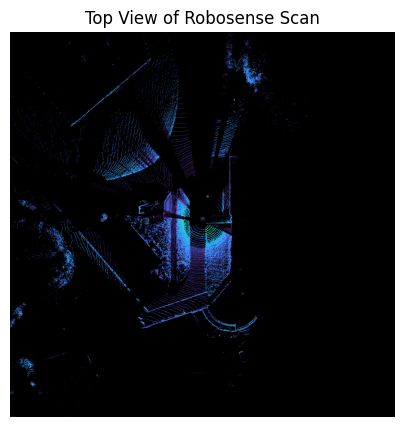

In [5]:
## TODO fix the TF
## TODO project lidar over radar

# Load lidar data
data_robosense = load_fomo_lidar(
    dataset_base_path, deployment, trajectory, load_robosense=True
)
# transform robosense to navtech frame
tf_tree = FoMoTFTree()
tf = tf_tree.get_transform(from_frame="robosense", to_frame="navtech")
data_robosense = transform_points(data_robosense, tf)


plt.figure(figsize=(5, 5))
plt.imshow(make_top_view(data_robosense))
plt.title("Top View of Robosense Scan")
plt.axis("off")
plt.show()

## 4. Convert between polar and cartesian radar data

Save a radar scan as a cartesian image without metadata

[ WARN:0@30.771] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


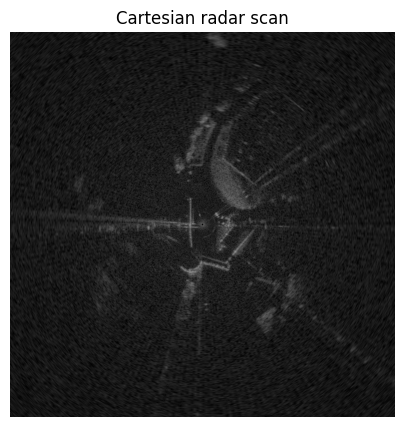

Loaded 400 radar measurements
First 5 measurements:
         timestamps  azimuths  fft meas   mean fft
0  1760456485551626  0.077487      6848  28.257010
1  1760456485552251  0.232461      6848  22.856600
2  1760456485552876  0.387435      6848  28.746933
3  1760456485553501  0.542409      6848  23.800526
4  1760456485554126  0.697383      6848  27.473715


In [6]:
import cv2
from fomo_sdk.radar.utils import load

ENDODER_SIZE = 5595

cart_file = Path("data/radar_cart.png")
polar_file = Path("data/radar_polar.png")

save(cart_file, timestamps, azimuths, fft_data, is_cartesian=True)
save(polar_file, timestamps, azimuths, fft_data, is_cartesian=False)

cartesian_data = cv2.imread(cart_file)

plt.figure(figsize=(5, 5))
plt.imshow(cartesian_data, cmap="gray")
plt.title("Cartesian radar scan")
plt.axis("off")
plt.show()

timestamps2, azimuths2, fft_data2 = load(polar_file)
print(f"Loaded {len(timestamps)} radar measurements")
print("First 5 measurements:")
df = pd.DataFrame(
    {
        "timestamps": timestamps2.flatten(),
        "azimuths": azimuths2.flatten(),
        "fft meas": fft_data2.shape[1],
        "mean fft": fft_data2.mean(axis=1),
    }
)
print(df.head())

## 5. Loading from Rosbag (TODO)

If you have a rosbag, you can use `rosbags` to read `sensor_msgs/PointCloud2`.
Note: This requires a valid rosbag file.

In [ ]:
# Example code for loading from rosbag
# from rosbags.rosbag2 import Reader
# from rosbags.serde import deserialize_cdr, ros1_to_cdr
# from fomo_sdk.lidar.utils import downsample_pointcloud

# bag_path = "path/to/your/rosbag"
# if os.path.exists(bag_path):
#     with Reader(bag_path) as reader:
#         for connection, timestamp, rawdata in reader.messages():
#             if connection.topic == "/your/lidar/topic":
#                 msg = deserialize_cdr(rawdata, connection.msgtype)
#                 # Process msg here
#                 print(f"Found message at {timestamp}")
#                 break